# Recommendation system part I:
## Product popularity based recommendation system targeted at new customers

- Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.
- Dataset : [Amazon product review dataset](https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

# import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv("../data/ratings_Beauty.csv")
display(amazon_ratings.describe())
display(amazon_ratings.isna().sum())
display(amazon_ratings.isnull().sum())

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

<Axes: >

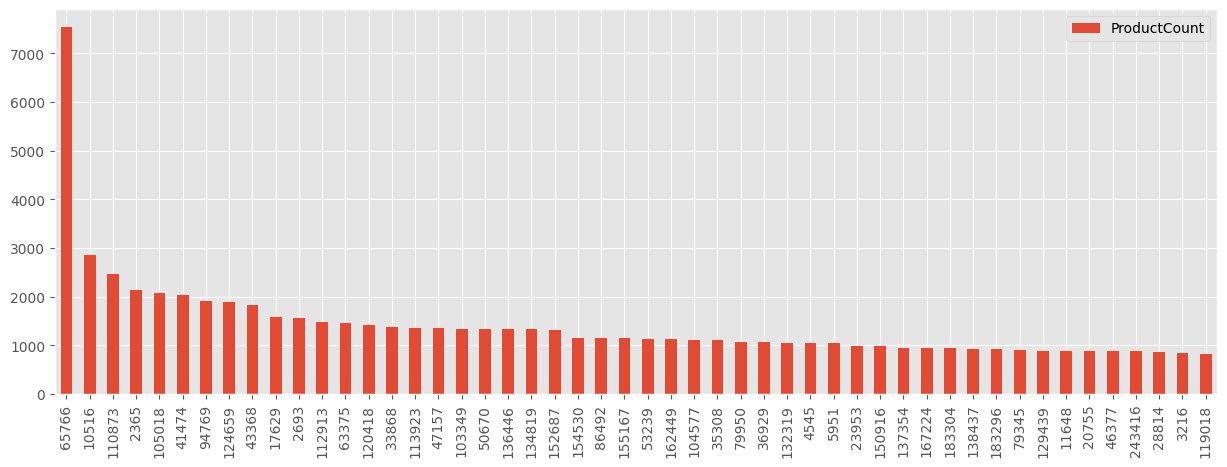

In [3]:
# most popular products
# plt.figure(figsize=(10, 40))
product_popularity = pd.DataFrame(
    amazon_ratings.groupby("ProductId", as_index=False)["Rating"].count()
    ).rename(columns={"Rating": "ProductCount"}) \
    .sort_values(by=["ProductCount"], ascending=False)
product_popularity.head(50).plot(kind="bar", figsize=(15, 5))

# Recommendation System - Part II
## Model-based collaborative filtering system

- Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
- A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

_Utility Matrix based on products sold and user reviews._  
**Utility Matrix:** An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [7]:
amazon_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [11]:
rating_utility_matrix = amazon_ratings.head(10000).pivot_table(values="Rating", index="UserId", columns="ProductId", fill_value=0)
print(f"utility matrix shape: {rating_utility_matrix.shape}")
rating_utility_matrix.head()

utility matrix shape: (9697, 886)


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.decomposition import TruncatedSVD

# if need ot replace missing values
# amazon_ratings.groupby("ProductID").apply(lambda x: x.Rating.fillna(value=x.Rating.mean(), inplace=True))

SVD = TruncatedSVD(n_components=10, random_state=42)
decomposed_matrix = SVD.fit_transform(rating_utility_matrix.T)
assert decomposed_matrix.shape[0] == rating_utility_matrix.shape[1]

corr_product_matrix = np.corrcoef(decomposed_matrix)
assert corr_product_matrix.shape == (rating_utility_matrix.shape[1], rating_utility_matrix.shape[1])

product_ids = list(rating_utility_matrix.columns)

def recoommned_similar_products(clicked_product_id="6117036094", top_n=10):
    product_index = product_ids.index(clicked_product_id)
    corr_values = corr_product_matrix[product_index]
    def find_siliar_product_indices():
        dict_indices = dict(zip(range(len(corr_values)), corr_values))
        top_n_indices = sorted(dict_indices, key=lambda x: dict_indices[x], reverse=True)[0:top_n]
        return top_n_indices
    return list(map(product_ids.__getitem__, find_siliar_product_indices()))

def recommend_user_similar_product(user_id=None, clicked_product_id="6117036094"):
    return {user_id: recoommned_similar_products(clicked_product_id=clicked_product_id)}

recommend_user_similar_product(user_id="Ali", clicked_product_id="6117036094")

/Users/ali/anaconda3/envs/recsys_framework/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ali/anaconda3/envs/recsys_framework/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ali/anaconda3/envs/recsys_framework/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


{'Ali': ['6117036094',
  'B000006J86',
  'B000025034',
  '9790780753',
  '979077480X',
  'B00004TZYD',
  '9790783809',
  '8430539387',
  '6022600812',
  'B000052XR3']}